# 1. Problem Definition
> Given some parameters about town, can we predict MEDV: Median value of owner-occupied homes in $1000's [k$] 

# 2.Data
The dataset used in this project is from kaggle ,link to the site(https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data)

The source of this dataset is `StatLib - Carnegie Mellon University`

# 3. Evaluation
In this mode|l the mode of evaluation was R-squared, MAE (Mean absolute error) and RMSE (Root Mean Squared Error) .

# 4. Features
Attribute Information
Input features in order:
1. `CRIM`: per capita crime rate by town
2. `ZN`: proportion of residential land zoned for lots over 25,000 sq.ft.
3. `INDUS`: proportion of non-retail business acres per town
4. `CHAS`: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. `NOX`: nitric oxides concentration (parts per 10 million) [parts/10M]
6. `RM`: average number of rooms per dwelling
7. `AGE`: proportion of owner-occupied units built prior to 1940
8. `DIS`: weighted distances to five Boston employment centres
9. `RAD`: index of accessibility to radial highways
10. `TAX`: full-value property-tax rate per $10,000 [$/10k]
11. `PTRATIO`: pupil-teacher ratio by town
12. `B`: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. `LSTAT`: % lower status of the population

**Output variable:**
1. `MEDV`: Median value of owner-occupied homes in $1000's [k$]

# Preparing the tools
* `pandas` for data analysis.
* `NumPy` for numerical operations.
* `Matplotlib/seaborn` for plotting or data visualization.
* `Scikit-Learn` for machine learning modelling and evaluation.

# Importing the data and preparing it for modelling

In [2]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# We want our plots to appear in the notebook
%matplotlib inline 

# Import dataset

In [3]:
df = pd.read_csv("boston.csv") # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)

(506, 14)

# Data Exploration
This will help in getting insight from the dataset.

In [4]:
# top 10 rows of our dataframe
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [5]:
# top 10 rows of our dataframe
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905,0.02985,0.08829,0.14455,0.21124,0.17004
ZN,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.50000,12.50000,12.50000,12.50000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000,2.18000,7.87000,7.87000,7.87000,7.87000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800,0.45800,0.52400,0.52400,0.52400,0.52400
RM,6.57500,6.42100,7.18500,6.99800,7.14700,6.43000,6.01200,6.17200,5.63100,6.00400
AGE,65.20000,78.90000,61.10000,45.80000,54.20000,58.70000,66.60000,96.10000,100.00000,85.90000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220,6.06220,5.56050,5.95050,6.08210,6.59210
RAD,1.00000,2.00000,2.00000,3.00000,3.00000,3.00000,5.00000,5.00000,5.00000,5.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000,222.00000,311.00000,311.00000,311.00000,311.00000


In [6]:
# Check the different values of different columns
df.value_counts()

CRIM      ZN    INDUS  CHAS  NOX    RM     AGE    DIS      RAD  TAX    PTRATIO  B       LSTAT  MEDV
0.00632   18.0  2.31   0     0.538  6.575  65.2   4.0900   1    296.0  15.3     396.90  4.98   24.0    1
1.00245   0.0   8.14   0     0.538  6.674  87.3   4.2390   4    307.0  21.0     380.23  11.98  21.0    1
1.38799   0.0   8.14   0     0.538  5.950  82.0   3.9900   4    307.0  21.0     232.60  27.71  13.2    1
1.35472   0.0   8.14   0     0.538  6.072  100.0  4.1750   4    307.0  21.0     376.73  13.04  14.5    1
1.34284   0.0   19.58  0     0.605  6.066  100.0  1.7573   5    403.0  14.7     353.89  6.43   24.3    1
                                                                                                      ..
0.11027   25.0  5.13   0     0.453  6.456  67.8   7.2255   8    284.0  19.7     396.90  6.73   22.2    1
0.10959   0.0   11.93  0     0.573  6.794  89.3   2.3889   1    273.0  21.0     393.45  6.48   22.0    1
0.10793   0.0   8.56   0     0.520  6.195  54.4   2.7778   5

**OBESERVATION**:
The columns have many different value count

In [7]:
# check missing data and data type of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**OBSERVATION**: 
1. The datatype in the colulmns are just `integers` and `characters`
2. The columns contain no missing data

In [8]:
# different metrics about our dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Correlation

**Observation**:the dataset needs to standardized

In [9]:
df.corr()
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

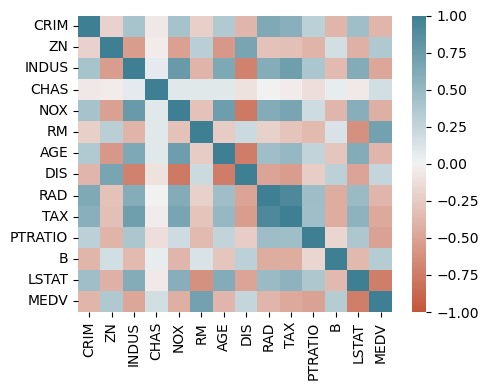

In [10]:
# Due to the large number of columns in this table,it's more convenient to plot the correlation as a heatmap.

fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

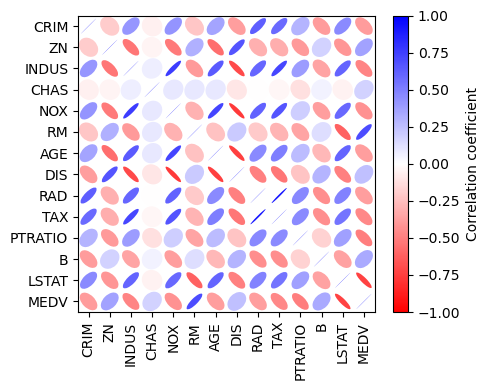

In [11]:
# Correlation heatmap with ellipse

from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(df, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(df)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(df, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(df.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(df.index)

    return ec, ax

m, ax = plot_corr_ellipses(df.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()


# Hexagonal binning plots 

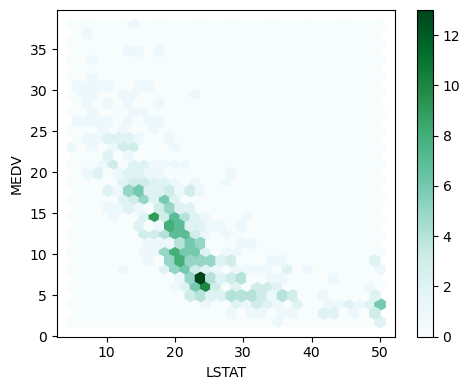

In [12]:
ax = df.plot.hexbin(y='LSTAT', x='MEDV',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_ylabel('MEDV')
ax.set_xlabel('LSTAT')

plt.tight_layout()
plt.show()

In [37]:
# Names of columns
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

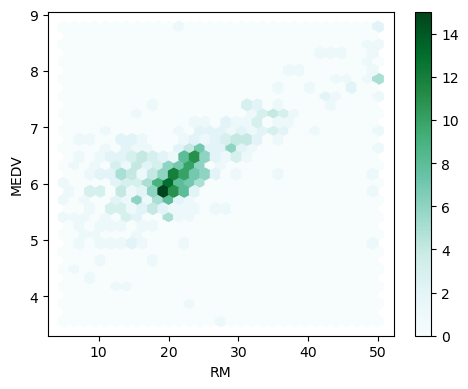

In [13]:
ax = df.plot.hexbin(y='RM', x='MEDV',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_ylabel('MEDV')
ax.set_xlabel('RM')

plt.tight_layout()
plt.show()

# Density plot

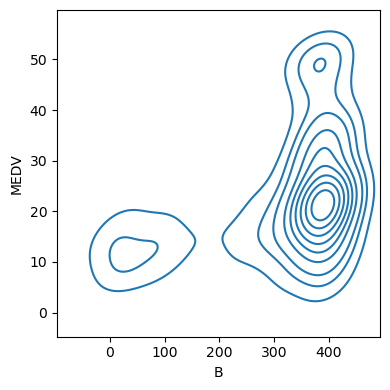

In [14]:
# Relationship between B and MEDV

fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=df, x='B', y='MEDV', ax=ax)
ax.set_xlabel('B')
ax.set_ylabel('MEDV')

plt.tight_layout()
plt.show()

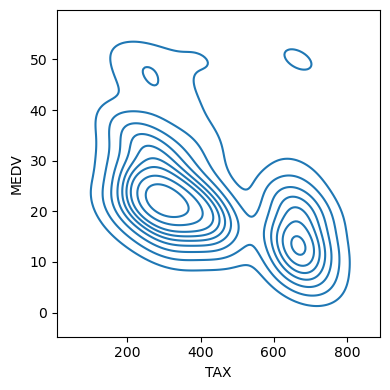

In [15]:
# Relationship between B and MEDV

fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=df, x='TAX', y='MEDV', ax=ax)
ax.set_xlabel('TAX')
ax.set_ylabel('MEDV')

plt.tight_layout()
plt.show()

# checking missing data

In [16]:
# Check for missing values
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

`OBSERVATION`:There is no missing data

# Modeling
## splitting data

In [17]:
# names of columns
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [18]:
# Everything except target variable
X = df.drop("MEDV", axis=1)

# Target variable
y = df.MEDV.values

## Rescaling the data

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
print(scaled_data)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


## train and test split

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
# Random seed for reproducibility
np.random.seed(55)


X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

# Building an evaluation function

In [21]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

# Base model

In [22]:
from sklearn.ensemble import RandomForestRegressor
# Create model
model = RandomForestRegressor()

# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=100)

In [23]:
%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

CPU times: total: 375 ms
Wall time: 239 ms


RandomForestRegressor(max_samples=100, n_jobs=-1)

In [38]:
# how our model performed
show_scores(model)

{'Training MAE': 1.7416996699669964,
 'Valid MAE': 2.7713762376237634,
 'Training RMSLE': 0.10544558771174156,
 'Valid RMSLE': 0.17965922622143635,
 'Training R^2': 0.9198362195920833,
 'Valid R^2': 0.786143747457901}

## Hyperparameter tuning with RandomizedSearchCV

In [25]:
%%time
from sklearn.model_selection import RandomizedSearchCV


# removing warnings
import warnings
warnings.filterwarnings("ignore")

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [100]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 9.34 s
Wall time: 9.36 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [100],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [26]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 100,
 'max_features': 0.5,
 'max_depth': None}

In [27]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 1.8598597359735978,
 'Valid MAE': 2.7094554455445548,
 'Training RMSLE': 0.11238810988374019,
 'Valid RMSLE': 0.17227265152323168,
 'Training R^2': 0.899236441983964,
 'Valid R^2': 0.795512761019196}

# Train a model with the best parameters

In [28]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: total: 188 ms
Wall time: 205 ms


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [29]:
show_scores(ideal_model)

{'Training MAE': 1.5581878230831048,
 'Valid MAE': 2.636415961959545,
 'Training RMSLE': 0.09676939134793244,
 'Valid RMSLE': 0.17149533561612704,
 'Training R^2': 0.9429223043201812,
 'Valid R^2': 0.8075393011378179}

# Make predictions on test data

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions
y_preds = ideal_model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8592193383018989
MAE: 2.801922645180195
MSE: 13.912985282861735


# visualize the original and predicted test data

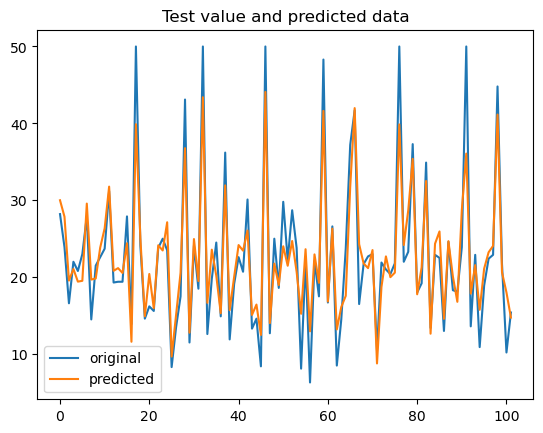

In [31]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_preds, label="predicted")

plt.title("Test value and predicted data")

plt.legend()
plt.show()